# Cascade R-CNN Demo

This is a [Cascade R-CNN](https://arxiv.org/abs/1712.00726) colab notebook using the open source project [open-mmlab/mmdetection](https://github.com/open-mmlab/mmdetection) (Open MMLab Detection Toolbox).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

Updated by [Kevin](https://github.com/loveunk) on 11/28/2019:
- revise the code to support the latest mmdetection


## Install Open MMLab Detection Toolbox

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/open-mmlab/mmdetection.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !pip install -q mmcv==0.2.10 albumentations==0.3.2
  !pip install -q terminaltables imagecorruptions
  # build
  !cd {project_name} && python setup.py develop
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Prepare model

According to [MODEL_ZOO.md#cascade-r-cnn](https://github.com/open-mmlab/mmdetection/blob/master/MODEL_ZOO.md#cascade-r-cnn), the Cascade R-CNN model `x101_64x4d_fpn_1x` has a Box mAP 44.6 on the COCO dataset. We will use it: 

In [0]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

config_file = join(project_name, 'configs/cascade_rcnn_x101_64x4d_fpn_1x.py')
checkpoint_file = 'https://s3.ap-northeast-2.amazonaws.com/open-mmlab/mmdetection/models/cascade_rcnn_x101_64x4d_fpn_1x_20181218-e2dc376a.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

## Evaluate on a test image

First, download a test image from the internet:

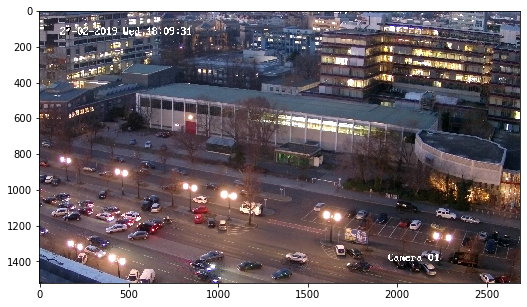

In [3]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL

import cv2
plt.figure(figsize=(10, 5))
plt.imshow(cv2.imread(image_file)[:,:,::-1])

Now evaluate the Cascade RCNN on the downloaded image and visualize the result:

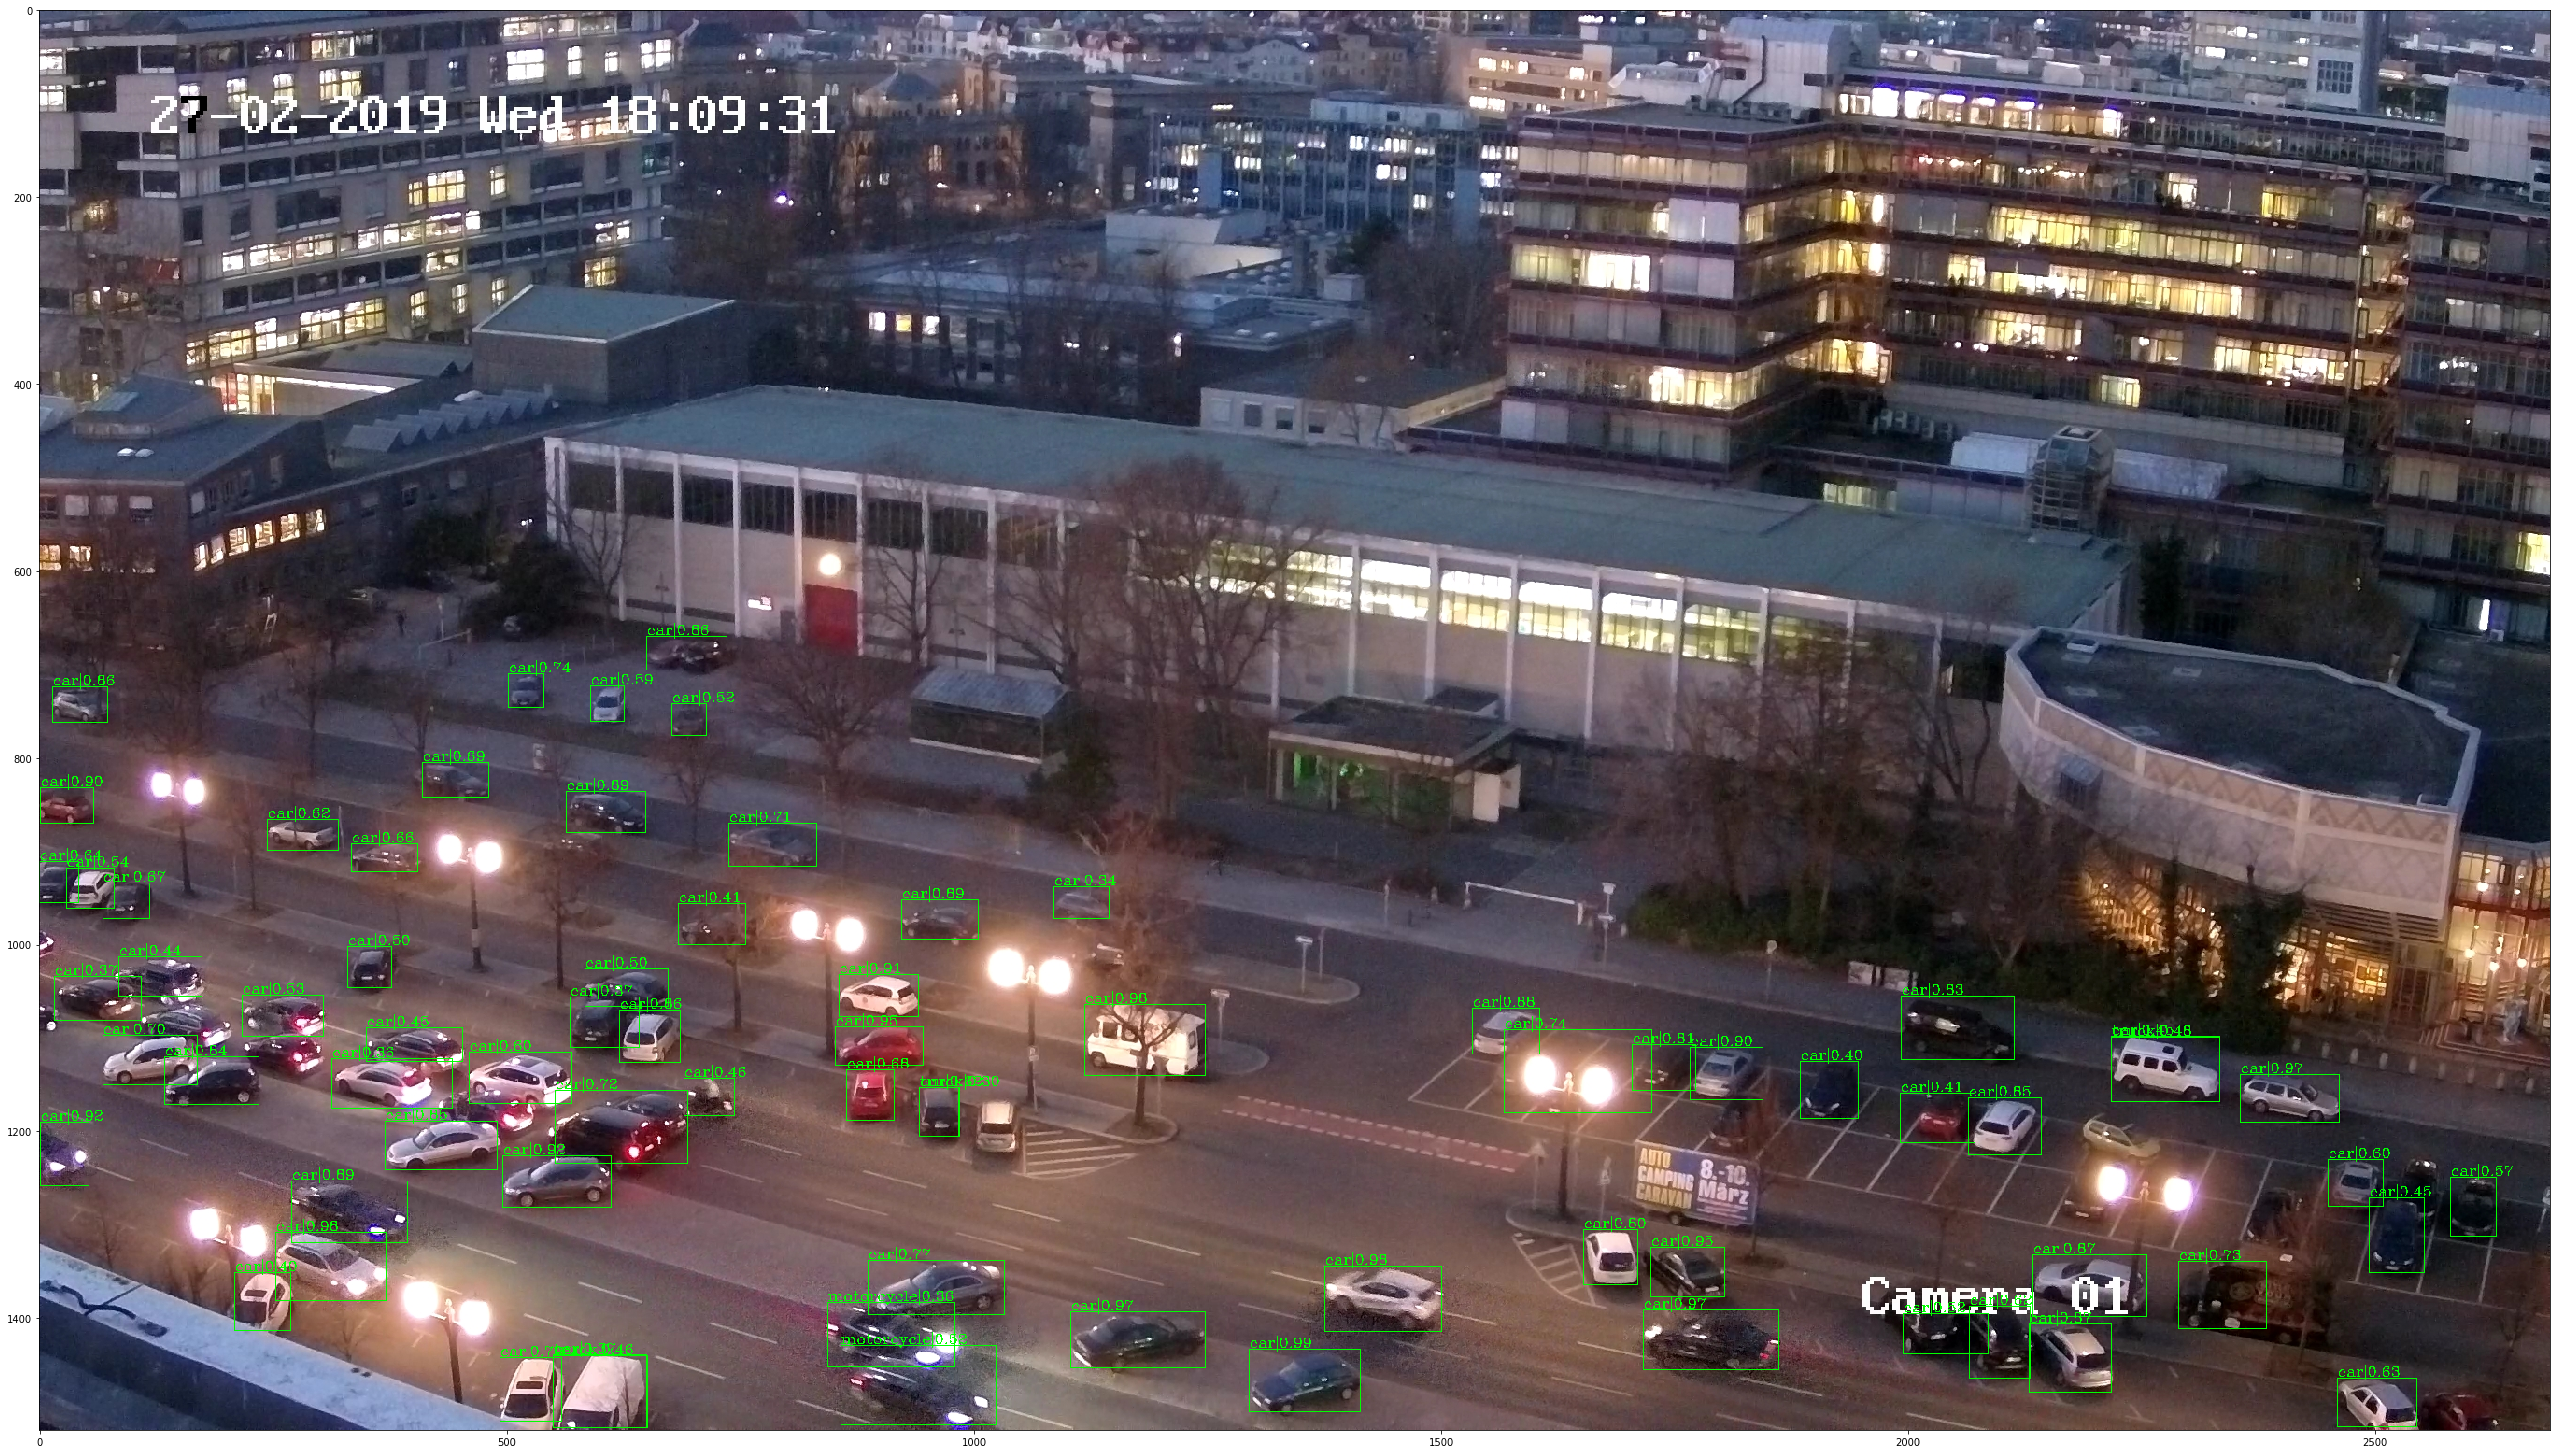

In [4]:
img = mmcv.imread(image_file)
result = inference_detector(model, img)
show_result_pyplot(img, result, model.CLASSES, fig_size=(45, 30))